# Задание 3. Временной ряд

---

## Этапы:
1. Генерация временного ряда (синус + тренд + шум)
2. Разделение train/test
3. Визуализация
4. Построение моделей (AR, ETS)
5. Оценка MAE и RMSE
6. Визуализация результатов

---


### 1. Генерация данных

In [10]:
import numpy as np

n_samples = 1000
t = np.arange(n_samples)

f_sin = 2.0 * np.sin(2.0 * np.pi * t / 50)  # Амплитуда = 2, период 50
trend = 0.01 * t
noise = np.random.normal(scale=0.8, size=n_samples)
y = f_sin + trend + noise

---

### 2. Разделение данных (train 80/ test 20)

In [11]:
# Так как np.array, то делим по индексу
idx_split = int(0.8 * n_samples)
y_train = y[:idx_split]
y_test = y[idx_split:]

---

### 3. Визуализация данных

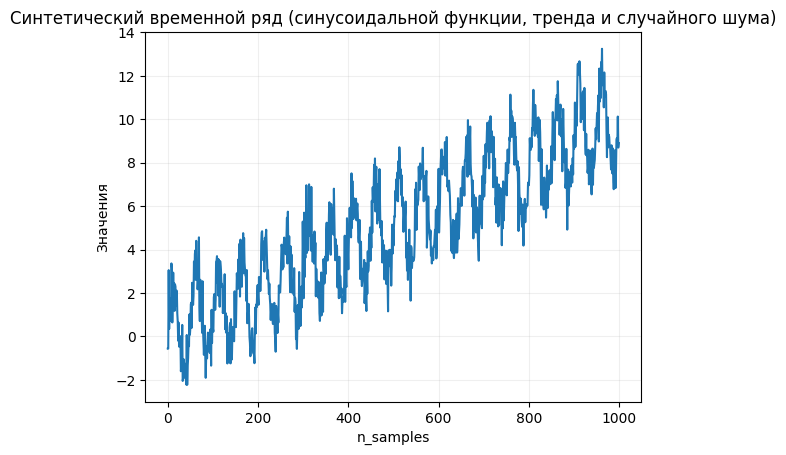

In [12]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(y)
plt.title("Синтетический временной ряд (синусоидальной функции, тренда и случайного шума)")
plt.xlabel("n_samples")
plt.ylabel("Значения")
plt.grid(alpha=0.2)
plt.show()

---

### 4. Построение моделей (AR, ETS)

In [13]:
from statsmodels.tsa.ar_model import AutoReg

# Автокорреляционная модель (AR)
ar_model = AutoReg(y_train, lags=50, old_names=False).fit()
ar_forecast = ar_model.forecast(steps=len(y_test))

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Модель экспоненциального сглаживания (ETS)
ets_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=50,
                                 initialization_method="estimated").fit()
ets_forecast = ets_model.forecast(steps=len(y_test))

---

### 5. Оценка MAE и RMSE

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE (Mean Absolute Error)
# 0.5-0.8
ar_mae = mean_absolute_error(y_test, ar_forecast)
ets_mae = mean_absolute_error(y_test, ets_forecast)

In [16]:
# RMSE (Root Mean Squared Error)
# 0.7-1
ar_rmse = np.sqrt(mean_squared_error(y_test, ar_forecast))
ets_rmse = np.sqrt(mean_squared_error(y_test, ets_forecast))

In [17]:
import pandas as pd

# Вывод дисплея с результатами
df = pd.DataFrame([
    {'model': 'AR', 'mae': ar_mae, 'rmse': ar_rmse},
    {'model': 'ETS', 'mae': ets_mae, 'rmse': ets_rmse},
])
display(df)

,model,mae,rmse
0,AR,0.80817,1.001950
1,ETS,0.64747,0.806522


---

### 6. Визуализация


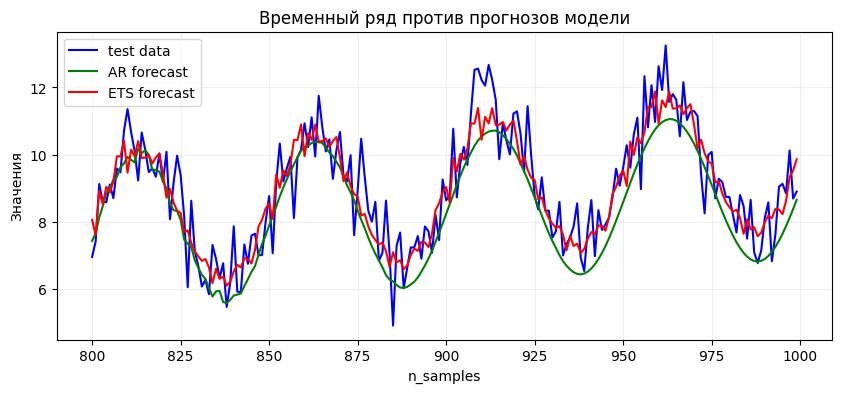

In [18]:
test_idx = np.arange(idx_split, idx_split + len(y_test))
plt.figure(figsize=(10, 4))
plt.plot(test_idx, y_test, 'b', label='test data')
plt.plot(test_idx, ar_forecast, 'g', label='AR forecast')
plt.plot(test_idx, ets_forecast, 'r', label='ETS forecast')
plt.legend()
plt.title("Временный ряд против прогнозов модели")
plt.xlabel("n_samples")
plt.ylabel("Значения")
plt.grid(alpha=0.2)
plt.show()